# step1
 import library

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# step2 
import dataset 

In [3]:
df = pd.read_csv("C:/Users/amalv/OneDrive/Desktop/alliance/ml/decision tree/car_evaluation.csv")


df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# step3
exploratory data analysis

In [4]:
cols = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

df.columns = cols

df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
X = df.drop(["class"], axis =1)

y = df['class']

In [7]:
X

,buying,maint,doors,person,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [8]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

# step 4
lets split the data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state= 42)

In [10]:

x_train.head()

,buying,maint,doors,person,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


# step 5 - feature engineering

values are categorical but character in nature lets converthem into categorical with numeric values 

we use encoding method

here the data are order so we use ordinal encoder

In [11]:
x_train.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'], dtype='object')

In [12]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)


In [13]:
x_train,x_test

(      buying  maint  doors  person  lug_boot  safety
 83         1      1      1       1         1       1
 48         1      1      2       2         1       2
 468        2      1      2       3         2       2
 155        1      2      2       2         1       1
 1043       3      2      3       2         2       1
 ...      ...    ...    ...     ...       ...     ...
 1130       3      3      2       2         3       1
 1294       3      4      1       2         3       3
 860        2      4      1       2         3       1
 1459       4      2      3       1         2       3
 1126       3      3      2       2         2       3
 
 [1157 rows x 6 columns],
       buying  maint  doors  person  lug_boot  safety
 599        2      2      3       1         3       1
 932        3      1      3       3         3       1
 628        2      2      1       1         3       3
 1497       4      2      1       3         1       2
 1262       3      4      3       2         1       1


# step 5 
decisiotree classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
# lets create gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [16]:
clf_gini.fit(x_train, y_train)    #train data using gini index

DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pedi_gini = clf_gini.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

print(f"acuracy score = {accuracy_score(y_test, y_pedi_gini):.4f}")

acuracy score = 0.8053


In [19]:
print(f"training score = {clf_gini.score(x_train, y_train):.4f}")
print(f"testing score = {clf_gini.score(x_test, y_test):.4f}")

training score = 0.7848
testing score = 0.8053


# now lets built a decision tree

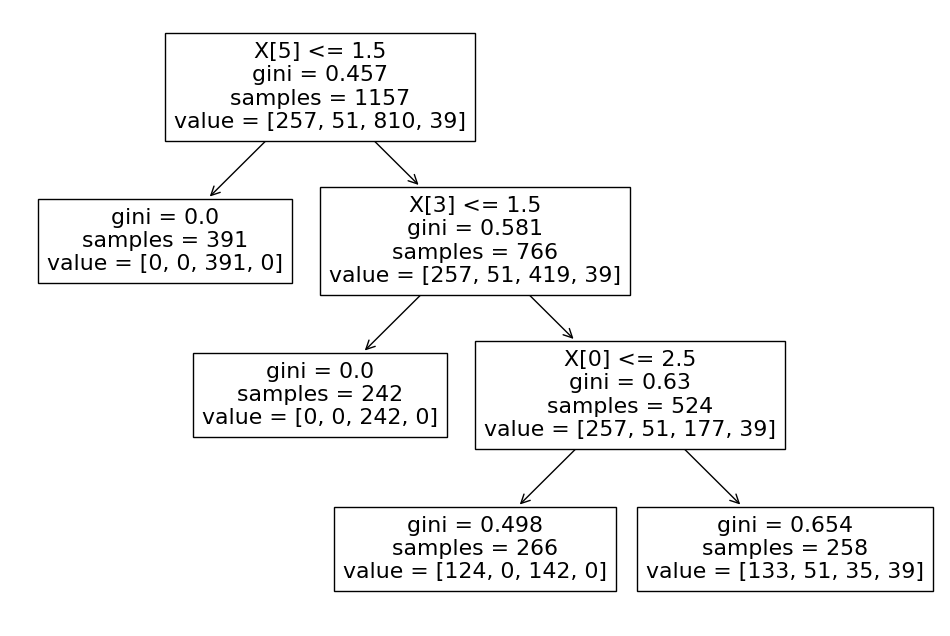

In [20]:
from sklearn import tree


plt.figure(figsize=(12,8))


tree.plot_tree(clf_gini.fit(x_train,  y_train));

### now lets make more beautiful tree or more reliable tree using grapviz

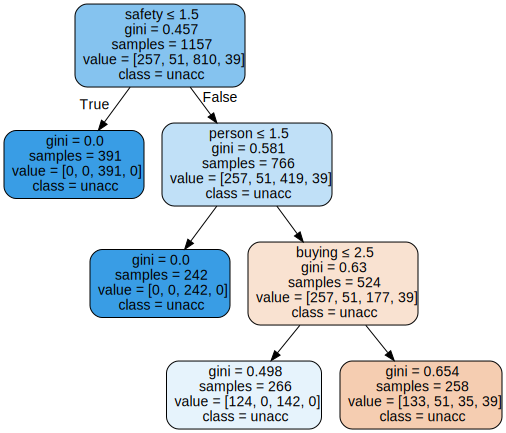

In [21]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)


graph = graphviz.Source(dot_data)

graph

In [22]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

unacc have more value so the tree will tends to predict unacc more 

we can do random forest to encounderthis

the case of imbalanced datasets where one class has significantly more instances than others, decision tree models (and other machine learning algorithms) tend to be biased towards predicting the majority class. This occurs because the model learns to optimize overall accuracy, and if it predicts the majority class most of the time, it might achieve high accuracy, but at the cost of neglecting the minority classes.